In [1]:
%matplotlib inline

from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from numpy.random import rand

from ipywidgets import FloatSlider, interactive, IntSlider

In [2]:
def simple_example(amplitude=2.0, phase=0.0):
    plt.rcParams['figure.figsize'] = 8,6
    plt.figure()
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y = amplitude * np.sin(x + phase)
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.ylim(-2*np.pi, 2*np.pi)
    return

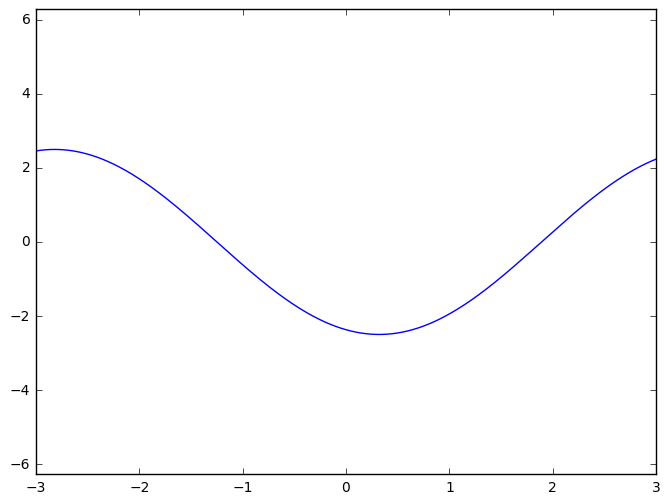

In [3]:
amplitude_slider = FloatSlider(value=2.0, min=0, max=3.0, step=.05)
phase_slider = FloatSlider(value=0.0, min=-np.pi, max=np.pi, step=.05)

interactive(simple_example,
            amplitude=amplitude_slider,
            phase=phase_slider
           )

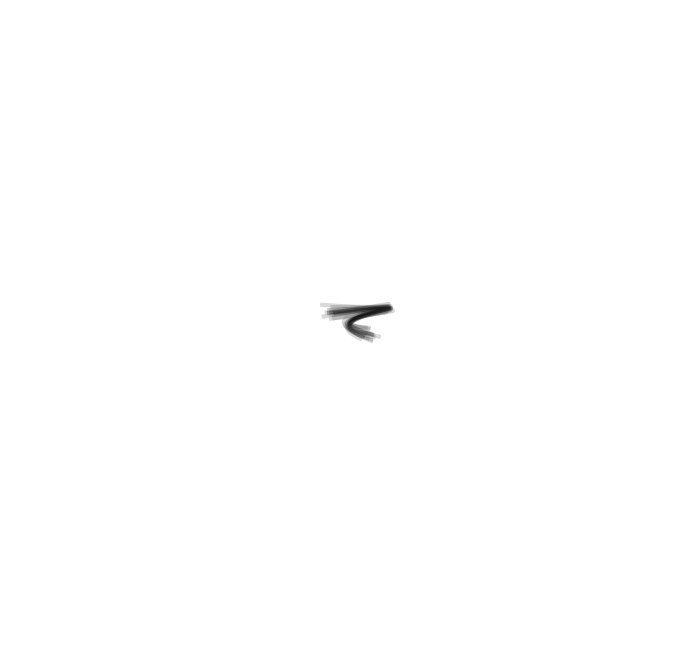

In [4]:
def spline_demo(num=14, smooth=0, seed=10, brush_strokes=30, alpha=0.5):
    a = np.random.RandomState(seed=seed)
    x = a.rand(num)
    y = a.rand(num)
    t = np.arange(0, 1.1, .1)
    plt.rcParams['figure.figsize'] = 8,8
    plt.figure()
    for _ in range(brush_strokes):
        tck, u = interpolate.splprep([x+a.rand(num)/10.0,y+a.rand(num)/10.0], s=smooth)
        unew = np.arange(0, 1.01, 0.001)
        out = interpolate.splev(unew, tck)
        plt.plot(out[0], out[1], alpha=alpha, c='black', linewidth=3.0)
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.5, 2.5)
    plt.axis('off')

smooth_slider = FloatSlider(value=0, min=0, max=20.0, step=.1)
num_points_slider = IntSlider(value=8, min=4, max=20)
seed_slider = IntSlider(value=4, min=4, max=20)
brush_slider = IntSlider(value=1, min=1, max=20)
alpha_slider = FloatSlider(value=.5, min=0, max=1.0, step=.05)

w=interactive(spline_demo,
              smooth=smooth_slider, 
              num=num_points_slider, 
              seed=seed_slider, 
              brush_strokes=brush_slider,
              alpha=alpha_slider)
w

In [5]:
import traitlets

In [9]:
from IPython.display import display

In [7]:
import ipywidgets as widgets

In [10]:
caption = widgets.Label(value = 'The values of slider1 and slider2 are synchronized')
sliders1, slider2 = widgets.IntSlider(description='Slider 1'),\
                             widgets.IntSlider(description='Slider 2')
l = traitlets.link((sliders1, 'value'), (slider2, 'value'))
display(caption, sliders1, slider2)


In [ ]:
caption = widgets.Label(value = 'Changes in source values are reflected in target1')
source, target1 = (widgets.IntSlider(description='Source'),
                   widgets.IntSlider(description='Target 1'))

In [11]:
dl = traitlets.dlink((source, 'value'), (target1, 'value'))
display(caption, source, target1)